#CLUSTERING ANALYSIS

Objective:

The objective of this assignment is to introduce to various clustering algorithms, including K-Means, hierarchical, and DBSCAN, and provide hands-on experience in applying these techniques to a real-world dataset.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import f_classif
from sklearn.cluster import KMeans,DBSCAN
from sklearn.metrics import silhouette_score

Data Preprocessing:

1. Preprocess the dataset to handle missing values, remove outliers, and scale the features if necessary.

2. Perform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential clusters.

3. Use multiple visualizations to understand the hidden patterns in the dataset

In [3]:
df=pd.read_excel('/content/EastWestAirlines.xlsx',sheet_name="data")

In [4]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
df.shape

(3999, 12)

In [6]:
df.isnull().sum()

,0
ID#,0
Balance,0
Qual_miles,0
cc1_miles,0
cc2_miles,0
cc3_miles,0
Bonus_miles,0
Bonus_trans,0
Flight_miles_12mo,0
Flight_trans_12,0


In [7]:
df.duplicated().sum()

np.int64(0)

<Axes: >

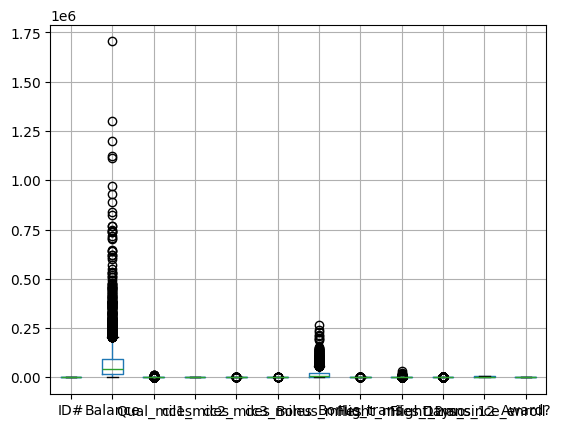

In [8]:
df.boxplot()

In [9]:
def outlier_capping(df,column):
    q1=df[column].quantile(0.25)
    q3=df[column].quantile(0.75)
    iqr=q3-q1
    lower_extreme=q1-1.5*iqr
    upper_extreme=q3+1.5*iqr
    df[column]=df[column].apply(lambda x: lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in df.select_dtypes(["int","float"]):
    outlier_capping(df,col)

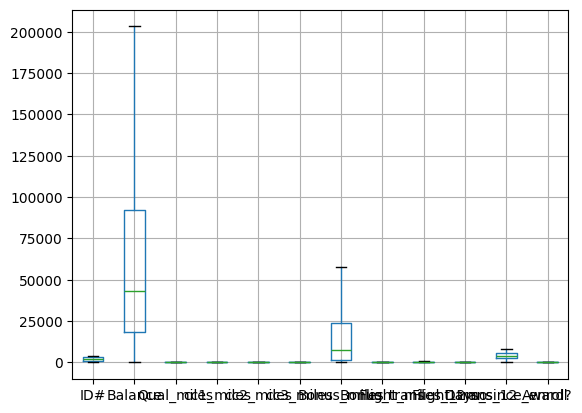

In [10]:
df.boxplot()
plt.show()

In [11]:
target=df[["Award?"]]
features=df.drop(columns=["Award?"])

In [12]:
target.head()

,Award?
0,0
1,0
2,0
3,0
4,1


In [13]:
features.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,1,28143.0,0.0,1,1.0,1.0,174.0,1.0,0.0,0.0,7000
1,2,19244.0,0.0,1,1.0,1.0,215.0,2.0,0.0,0.0,6968
2,3,41354.0,0.0,1,1.0,1.0,4123.0,4.0,0.0,0.0,7034
3,4,14776.0,0.0,1,1.0,1.0,500.0,1.0,0.0,0.0,6952
4,5,97752.0,0.0,4,1.0,1.0,43300.0,26.0,777.5,2.5,6935


In [14]:
min_max=MinMaxScaler()

In [15]:
scaled_data=pd.DataFrame(min_max.fit_transform(features),columns=features.columns)

In [16]:
scaled_data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0.000000,0.138486,0.0,0.00,0.0,0.0,0.003019,0.026316,0.0,0.0,0.843742
1,0.000249,0.094696,0.0,0.00,0.0,0.0,0.003731,0.052632,0.0,0.0,0.839884
2,0.000498,0.203495,0.0,0.00,0.0,0.0,0.071547,0.105263,0.0,0.0,0.847842
3,0.000746,0.072710,0.0,0.00,0.0,0.0,0.008677,0.026316,0.0,0.0,0.837955
4,0.000995,0.481019,0.0,0.75,0.0,0.0,0.751394,0.684211,1.0,1.0,0.835905


In [17]:
corr=scaled_data.corr()

In [18]:
corr

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
ID#,1.000000,-0.269374,NaN,-0.224465,NaN,NaN,-0.210868,-0.156118,-0.083917,-0.082887,-0.964988
Balance,-0.269374,1.000000,NaN,0.446510,NaN,NaN,0.494422,0.409017,0.297045,0.295565,0.286143
Qual_miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc1_miles,-0.224465,0.446510,NaN,1.000000,NaN,NaN,0.912531,0.627786,0.098786,0.087618,0.230849
cc2_miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc3_miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bonus_miles,-0.210868,0.494422,NaN,0.912531,NaN,NaN,1.000000,0.663558,0.205801,0.193669,0.217320
Bonus_trans,-0.156118,0.409017,NaN,0.627786,NaN,NaN,0.663558,1.000000,0.310543,0.308518,0.170308
Flight_miles_12mo,-0.083917,0.297045,NaN,0.098786,NaN,NaN,0.205801,0.310543,1.000000,0.942734,0.095019
Flight_trans_12,-0.082887,0.295565,NaN,0.087618,NaN,NaN,0.193669,0.308518,0.942734,1.000000,0.091898


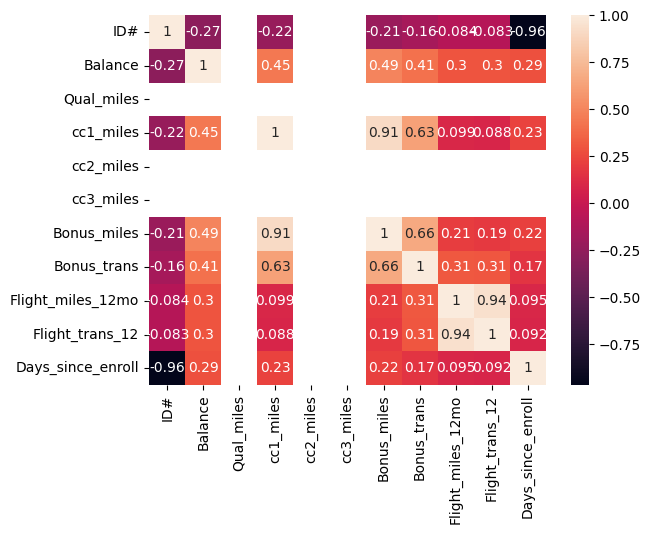

In [19]:
sns.heatmap(corr,annot=True)
plt.show()

In [20]:
f_class=f_classif(scaled_data,target)

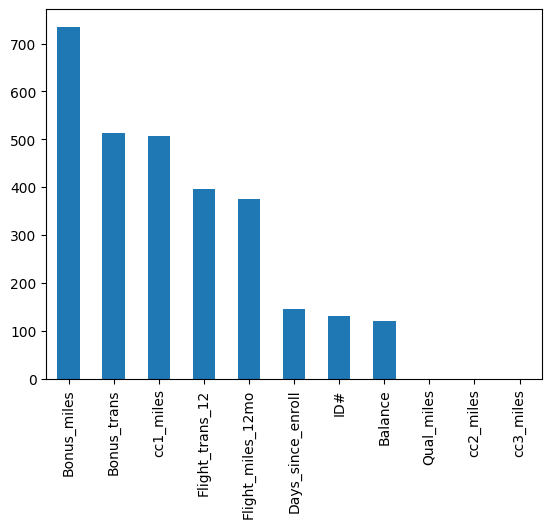

In [21]:
pd.Series(f_class[0],index=scaled_data.columns).sort_values(ascending=False).plot(kind="bar")
plt.show()

In [22]:
features1=scaled_data.drop(columns=['Qual_miles','cc2_miles','cc3_miles'])

In [23]:
features1

,ID#,Balance,cc1_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0.000000,0.138486,0.00,0.003019,0.026316,0.000000,0.0,0.843742
1,0.000249,0.094696,0.00,0.003731,0.052632,0.000000,0.0,0.839884
2,0.000498,0.203495,0.00,0.071547,0.105263,0.000000,0.0,0.847842
3,0.000746,0.072710,0.00,0.008677,0.026316,0.000000,0.0,0.837955
4,0.000995,0.481019,0.75,0.751394,0.684211,1.000000,1.0,0.835905
...,...,...,...,...,...,...,...,...
3994,0.999005,0.090917,0.00,0.147936,0.105263,0.257235,0.4,0.168917
3995,0.999254,0.316826,0.00,0.017023,0.131579,0.000000,0.0,0.167953
3996,0.999502,0.362157,0.50,0.441587,0.210526,0.000000,0.0,0.168797
3997,0.999751,0.270147,0.00,0.008677,0.026316,0.643087,0.4,0.168676


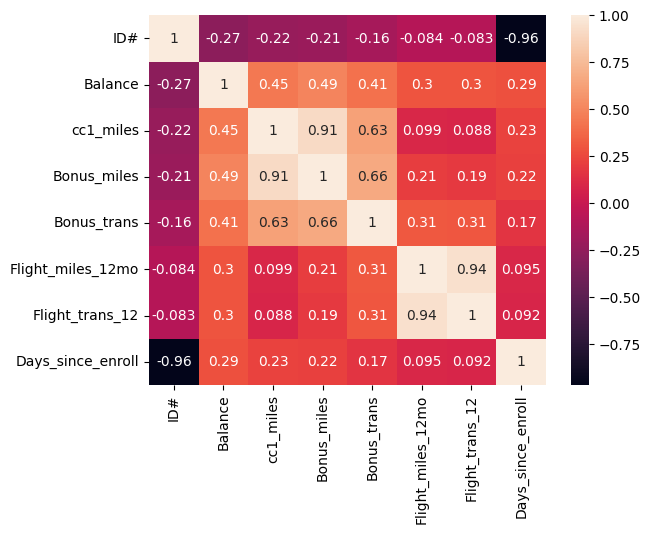

In [24]:
sns.heatmap(features1.corr(),annot=True)
plt.show()

Implementing Clustering Algorithms:

· Implement the K-Means and DBSCAN algorithms using a programming language such as Python with libraries like scikit-learn.

· Apply each clustering algorithm to the pre-processed dataset to identify clusters within the data.

· Experiment with different parameter settings for K-means (Elbow curve for different K values) and DBSCAN (e.g., epsilon, minPts) and evaluate the clustering results.

In [25]:
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(features1)
    inertia.append(kmeans.inertia_)

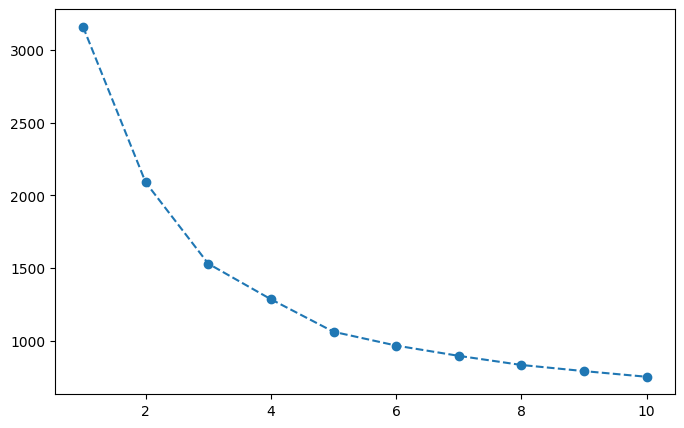

In [26]:
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.show()

In [27]:
## cluster = 2 by elbow method

In [28]:
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    labels = kmeans.fit_predict(features1)
    score = silhouette_score(features1, labels)
    print(f'Clusters: {i}, Silhouette Score: {score}')

Clusters: 2, Silhouette Score: 0.3907279681478401
Clusters: 3, Silhouette Score: 0.3458007992194574
Clusters: 4, Silhouette Score: 0.3438564125777995
Clusters: 5, Silhouette Score: 0.3288332435018441
Clusters: 6, Silhouette Score: 0.29405772360121474
Clusters: 7, Silhouette Score: 0.2920042636953561
Clusters: 8, Silhouette Score: 0.286279050775653
Clusters: 9, Silhouette Score: 0.2851120717434086
Clusters: 10, Silhouette Score: 0.28859470401349446


In [29]:
### clusters:2 is highest

In [30]:
kmean=KMeans(n_clusters=2,random_state=42)

In [31]:
cluster_labels=kmean.fit_predict(features1)

In [32]:
silhouette_score=silhouette_score(features1,cluster_labels)

In [33]:
silhouette_score

np.float64(0.3907279681478401)

In [35]:
eps = [0.1, 0.2, 0.3, 0.4, 0.5]

In [36]:

max=0
for i in eps:
    for j in range(1,11):
        dbscan=DBSCAN(eps=i,min_samples=j)
        lab=dbscan.fit_predict(features1)

        if (score>max):
            max=score
        print(f"eps={i}, min_samples={j}, silhouette={score:.3f}")
print(max)


eps=0.1, min_samples=1, silhouette=0.289
eps=0.1, min_samples=2, silhouette=0.289
eps=0.1, min_samples=3, silhouette=0.289
eps=0.1, min_samples=4, silhouette=0.289
eps=0.1, min_samples=5, silhouette=0.289
eps=0.1, min_samples=6, silhouette=0.289
eps=0.1, min_samples=7, silhouette=0.289
eps=0.1, min_samples=8, silhouette=0.289
eps=0.1, min_samples=9, silhouette=0.289
eps=0.1, min_samples=10, silhouette=0.289
eps=0.2, min_samples=1, silhouette=0.289
eps=0.2, min_samples=2, silhouette=0.289
eps=0.2, min_samples=3, silhouette=0.289
eps=0.2, min_samples=4, silhouette=0.289
eps=0.2, min_samples=5, silhouette=0.289
eps=0.2, min_samples=6, silhouette=0.289
eps=0.2, min_samples=7, silhouette=0.289
eps=0.2, min_samples=8, silhouette=0.289
eps=0.2, min_samples=9, silhouette=0.289
eps=0.2, min_samples=10, silhouette=0.289
eps=0.3, min_samples=1, silhouette=0.289
eps=0.3, min_samples=2, silhouette=0.289
eps=0.3, min_samples=3, silhouette=0.289
eps=0.3, min_samples=4, silhouette=0.289
eps=0.3, min_s

In [37]:
## silhouette_score = 0.28

In [38]:
dbscan=DBSCAN(eps=0.5,min_samples=3)

In [39]:
cluster1=dbscan.fit(features1)

In [40]:
label=dbscan.labels_

In [41]:
## the two clusters kmeans and dbscan. by using kmeans i have found the clusters by for loop, and also found the score.it is 0.39 while using dbscan by using the loops found the eps values and found the score.it is 0.29

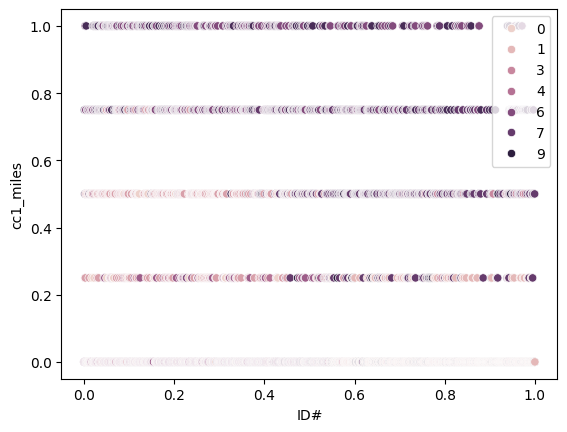

In [42]:
sns.scatterplot(data=features1,x='ID#',y='cc1_miles',hue=labels)
plt.show()

1.Evaluate the quality of clustering using internal evaluation metrics such as silhouette score for K-Means and DBSCAN.

In [43]:
## K-Means assumes spherical, equal-sized clusters good for compact data.
## DBSCAN identifies arbitrary shapes and noise, so silhouette scores may drop even when clustering is logically correct,for DBSCAN,eps and min_samples carefully
